Exporting Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Stock_A.csv')

In [ ]:
df.shape

(3778817, 8)

Checking for zero and NaN values

In [ ]:
# Count the number of rows where 'Load_Interval' is equal to 0
num_zero_Close = (df['Close'] == 0).sum()

# Print the result
print("Number of rows where Close is 0:", num_zero_Close)

Number of rows where Close is 0: 0


In [ ]:
# Count the number of NaN values in the 'Load_Interval' column
num_nan_Close = df['Close'].isna().sum()

# Print the result
print("Number of NaN values in Close column:", num_nan_Close)

Number of NaN values in Close column: 1227685


Removing some NaN values from Starting and Ending

In [ ]:
# Identify NaN values in the first 500000 rows of the 'Close' column
nan_indices = df.loc[:500000, 'Close'][df['Close'].isna()].index
# Drop these NaN values from the DataFrame
df.drop(nan_indices, inplace=True)
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
# Identify NaN values in the last 500000 rows of the 'Close' column
nan_indices = df.loc[df.index[-500000:], 'Close'][df['Close'].isna()].index
# Drop these NaN values from the DataFrame
df.drop(nan_indices, inplace=True)
# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(3274360, 8)

Replacing NaN values with an optimum value

In [ ]:
# Define a function to fill NaN values with the most optimum value
def fill_nan_optimum(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # If the column is categorical
            most_frequent = df[column].mode()[0]  # Find the mode (most frequent value)
            df[column].fillna(most_frequent, inplace=True)
        else:  # If the column is numerical
            median = df[column].median()  # Find the median
            df[column].fillna(median, inplace=True)
    return df

# Apply the function to the DataFrame
df = fill_nan_optimum(df)

Grouping every 100 values of the dataset and replacing with their mean

In [ ]:
# Function to group each 100 values and take their mean
def group_and_mean(df, group_size):
    # Ensure the DataFrame length is a multiple of the group size
    n_rows = (len(df) // group_size) * group_size
    df = df.iloc[:n_rows]

    # Group by taking mean of each group_size
    grouped_df = df.groupby(df.index // group_size).mean()

    return grouped_df

# Apply the function with a group size of 100
df = group_and_mean(df, 100)

In [ ]:
# Setting Timestamp as index
df.set_index("Timestamp", inplace=True)

In [ ]:
df

,Open,High,Low,Close,Volume_(Stock_A),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1.325870e+09,6.1207,6.1259,6.1198,6.1250,5.352933,29.694174,6.122322
1.326289e+09,6.9452,6.9498,6.9372,6.9432,2.656721,18.676592,6.945615
1.326721e+09,6.4698,6.4740,6.4640,6.4682,2.727653,17.337889,6.468629
1.327295e+09,6.4185,6.4185,6.4176,6.4176,7.770868,49.324986,6.418219
1.327800e+09,5.7483,5.7530,5.7430,5.7530,2.572059,14.998782,5.750813
...,...,...,...,...,...,...,...
1.552402e+09,3865.5651,3866.1962,3864.7784,3865.6048,2.279302,8812.090396,3865.566833
1.552408e+09,3854.6432,3855.3076,3853.8587,3854.6485,5.249058,20218.201046,3854.542213
1.552414e+09,3856.6987,3857.1287,3856.2834,3856.7324,2.001702,7719.923414,3856.687039


In [ ]:
values = df.values

Normalization

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

Creating window for previous data

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 5
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,3:4])

  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (32738, 1)
X (32738, 5, 7)


Splitting Dataset into Training and Testing

In [ ]:
#Splitting the dataset
n_train = int(len(X)*0.2)
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26191, 5, 7)
X_test (6547, 5, 7)
Y_train (26191, 1)
Y_test (6547, 1)


Designing and Training Model

In [ ]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X_train, Y_train, epochs = 20, batch_size = 8)

Epoch 1/20
3274/3274 [==============================] - 29s 8ms/step - loss: 7.6330e-04
Epoch 2/20
3274/3274 [==============================] - 24s 7ms/step - loss: 4.8508e-04
Epoch 3/20
3274/3274 [==============================] - 25s 8ms/step - loss: 4.3379e-04
Epoch 4/20
3274/3274 [==============================] - 25s 8ms/step - loss: 4.1181e-04
Epoch 5/20
3274/3274 [==============================] - 24s 7ms/step - loss: 3.5762e-04
Epoch 6/20
3274/3274 [==============================] - 25s 8ms/step - loss: 3.6991e-04
Epoch 7/20
3274/3274 [==============================] - 23s 7ms/step - loss: 3.6132e-04
Epoch 8/20
3274/3274 [==============================] - 24s 7ms/step - loss: 3.4687e-04
Epoch 9/20
3274/3274 [==============================] - 25s 7ms/step - loss: 3.4331e-04
Epoch 10/20
3274/3274 [==============================] - 24s 7ms/step - loss: 3.3581e-04
Epoch 11/20
3274/3274 [==============================] - 24s 7ms/step - loss: 3.2938e-04
Epoch 12/20
3274/3274 [=======

Testing accuracy of the prediction

In [ ]:
Y_pred = model.predict(X_test, batch_size=1)

6547/6547 [==============================] - 20s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
rmse

0.005952280603085612

In [ ]:
#Scaling back to the original scale
d = scaled_dataset[:6547,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760, :3], d[:8760, 4:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760, :3], d[:8760, 4:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (6547, 7)
Y_pred (6547, 1)
concat y_pred (6547, 1)
concat Y_test (6547, 1)


In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (6547, 1)
Y_predicted (6547, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)
rmse = np.sqrt(mse)
rmse

116.2406647073667

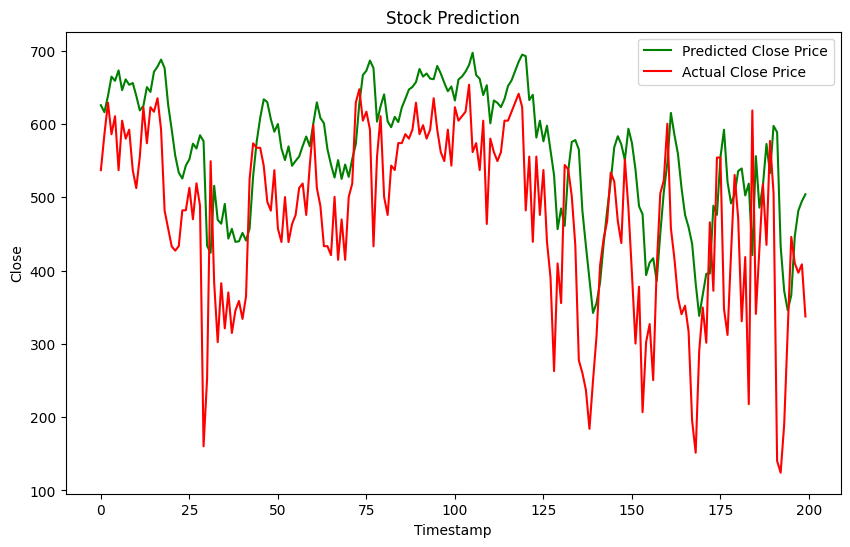

In [ ]:
#Plot the graph between actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(Y_predicted[1500:1700,:], color= 'green',label = 'Predicted Close Price')
plt.plot(Y_tested[1500:1700,:] , color = 'red',label = 'Actual Close Price')
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Close")
plt.legend()
plt.show()

Predicting for next 15 days

In [ ]:
# Define the window size (same as used during training)
window_size = 5

# Initialize scaler (make sure it's the same one used during training)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the feature columns (excluding the 'Close' column)
features = df.drop(columns=['Close'])
scaler.fit(features)

# Scale the feature columns
scaled_features = scaler.transform(features)

# Extract the most recent window of data for features and 'Close'
recent_features = scaled_features[-window_size:]
recent_close = df['Close'].values[-window_size:]

# Prepare the initial window for prediction by combining scaled features and 'Close' column
initial_window = np.hstack((recent_features, recent_close.reshape(-1, 1)))

# Reshape to fit the model input
X_pred = initial_window.reshape(1, window_size, -1)

# Initialize list to store predictions
predictions_scaled = []

# Predict the next fifteen days
for _ in range(15):
    # Predict the next time step
    next_pred_scaled = model.predict(X_pred)

    # Append the prediction to the list
    predictions_scaled.append(next_pred_scaled[0, 0])

    # Update the recent features (shift the window and maintain the features)
    recent_features = np.append(recent_features[1:], recent_features[-1:], axis=0)

    # Update recent 'Close' data with the new prediction
    recent_close = np.append(recent_close[1:], next_pred_scaled[0, 0])

    # Create the new window by combining updated recent features and 'Close' column
    next_window = np.hstack((recent_features, recent_close.reshape(-1, 1)))

    # Update X_pred
    X_pred = next_window.reshape(1, window_size, -1)

# Create a dummy array with the same shape as the original scaled features
dummy_array = np.zeros((15, scaled_features.shape[1]))

# Place the predictions in the 'Close' column position (4th column, index 3)
dummy_array[:, 3] = predictions_scaled

# Inverse transform using the scaler
inversed_predictions = scaler.inverse_transform(dummy_array)

# Extract the 'Close' column (4th column) from the inverse-transformed data
predictions = inversed_predictions[:, 3]

print('Predicted values for the next fifteen days:')
print(predictions)

1/1 [==============================] - 0s 18ms/step
Predicted values for the next fifteen days:
[318.61852028 318.59278008 315.32265769 308.21695896 280.96214931
  96.4783623   81.82944542  72.56768609  64.20708104  54.10855782
  44.80333396  42.64154089  41.26008927  40.3071512   39.64830123]


In [ ]:
print("Close Values prediction for next fifteen days:")
for i in range(15):
  print("DAY-"+str(i+1)+"    "+str(predictions[i]))

Close Values prediction for next fifteen days:
DAY-1    318.61852027768697
DAY-2    318.5927800836463
DAY-3    315.32265769012065
DAY-4    308.2169589630149
DAY-5    280.96214931098035
DAY-6    96.47836230246563
DAY-7    81.82944542101208
DAY-8    72.56768608575473
DAY-9    64.2070810437863
DAY-10    54.108557819997436
DAY-11    44.803333963537426
DAY-12    42.64154089281723
DAY-13    41.26008926916287
DAY-14    40.307151198408754
DAY-15    39.64830123171412


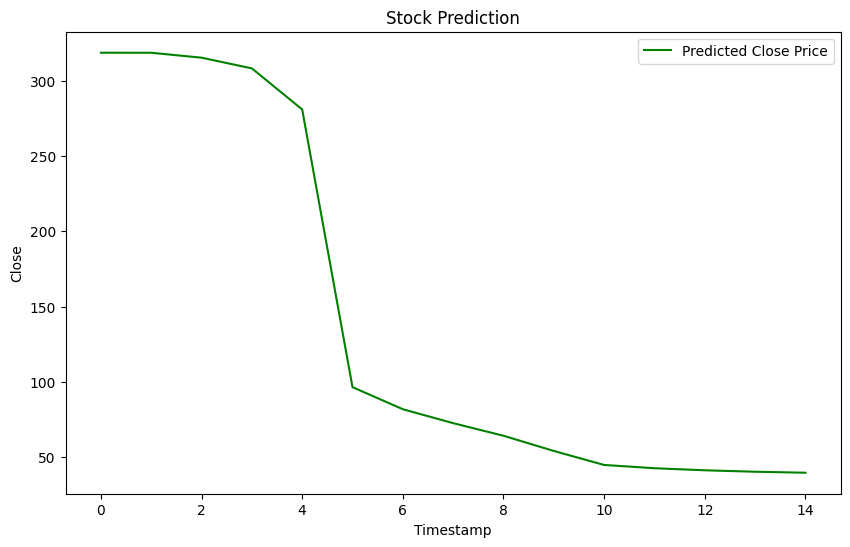

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(predictions, color= 'green',label = 'Predicted Close Price')
plt.title("Stock Prediction")
plt.xlabel("Timestamp")
plt.ylabel("Close")
plt.legend()
plt.show()